In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12


This notebook allows you to have a closer look at the underlying slab grid

In [3]:
slab_folder='./LineData/' #put in the path to your grid
slab_prefix='12_' #the slab_prefix
mol_name='H2O' #name of the molecules

In [4]:
#here the data is loaded
slab_data_loaded=np.load(f'{slab_folder}{slab_prefix}{mol_name}_convFlux.npy')
slab_wave=np.load(f'{slab_folder}{slab_prefix}{mol_name}_convWave.npy')
coldens=np.load(f'{slab_folder}{slab_prefix}parameter_col.npy')
temps=np.load(f'{slab_folder}{slab_prefix}parameter_temp.npy')

In [11]:
print(np.shape(slab_data_loaded))
print(np.shape(coldens))

(64, 60, 174297)
(64,)


In [ ]:
#specify the wavelength range you want to examine
min_wave=4.9
max_wave=28.0


lam_obs=slab_wave
flux_obs=slab_data_loaded
idx=np.where(lam_obs<=max_wave)[0]
lam_obs=lam_obs[idx]
flux_obs=flux_obs[:,:,idx]
idx=np.where(lam_obs>=min_wave)[0]
lam_obs=lam_obs[idx]
flux_obs=flux_obs[:,:,idx]


These are the possible grid points:

Large: Temperature=(25,50,75,100,...,1500)K, Log column density: (14, 14.1667, 14.333, ..., 24.5)<br>
Small: Temperature=(25,50,75,100,...,600)K, Log column density: (14, 14.1667, 14.333, ..., 24.5)<br>
The large grid is the defauls one, but C3H4 and C6H6 use the small one


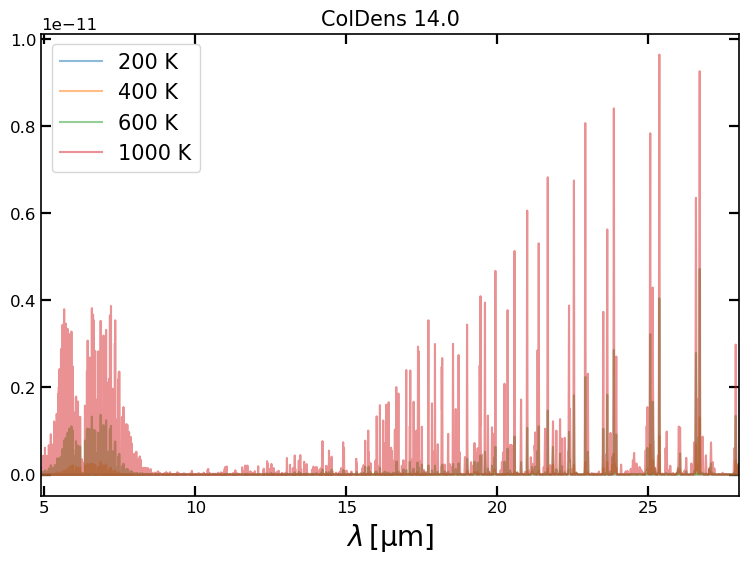

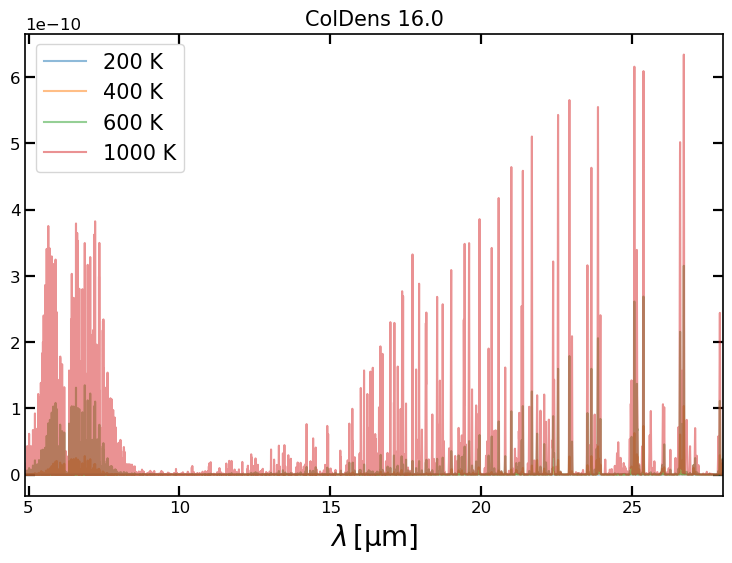

In [21]:
#specify which points of the grid you want to look at
#please not that these point most be align with the grid and can't be in between

coldens_check=[10**14.0,10**16.0]
temps_check=[200,400,600,1000]

#specify if you want plots there all column densities for the same T are together (t_together=True)
#or plots where different temperatures for the same column density are plotted (t_together=False)
t_together=False





if t_together:
    for i in range(len(temps_check)):
        idx_t=np.where(temps==temps_check[i])[0][0]
        plt.figure()
        plt.title(f'{temps_check[i]} K')
        for colden in coldens_check:
            idx_c=np.where(coldens==colden)[0][0]
            plt.plot(lam_obs,flux_obs[idx_c,idx_t],alpha=0.5,label=f'ColDens {np.log10(colden)}')
            plt.xlim([min_wave,max_wave])
        plt.xlabel(r'$\lambda\,\rm [\mu m]$')
        plt.legend()
        plt.show()
else:
    
    for i in range(len(coldens_check)):
        idx_c=np.where(coldens==coldens_check[i])[0][0]
        plt.figure()
        plt.title(f'ColDens {np.log10(coldens_check[i])}')
        for temp in temps_check:
            idx_t=np.where(temps==temp)[0][0]
            plt.plot(lam_obs,flux_obs[idx_c,idx_t],alpha=0.5,label=f'{temp} K')
            plt.xlim([min_wave,max_wave])
        plt.xlabel(r'$\lambda\,\rm [\mu m]$')
        plt.legend()
        plt.show()